Enter passenger name: Shashank 
Enter ticket class (1, 2, or 3): 2
Prediction: Survived


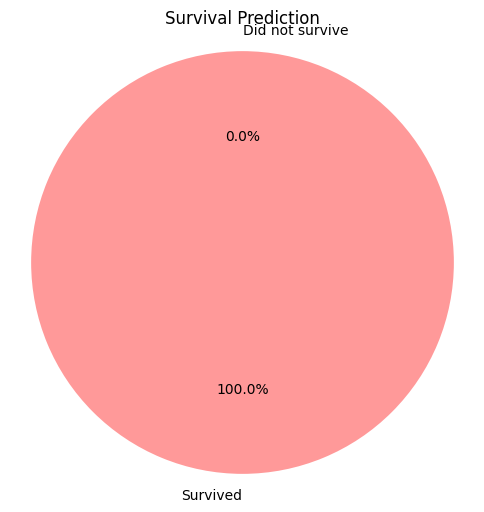

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'Titanic-Dataset.csv'  # replace with your file path
titanic_data = pd.read_csv(file_path)

# Preprocess the data
def preprocess_data(data):
    data = data.copy()
    # Fill missing values
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    # Drop columns that are not needed
    data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
    # Convert categorical variables to numeric
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
    return data

# Preprocess the dataset
processed_data = preprocess_data(titanic_data)

# Split the data into features and target
X = processed_data.drop(columns=['Survived'])
y = processed_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the predictive model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to predict survival
def predict_survival(name, pclass):
    # Use the first matching name from the dataset
    matching_passengers = titanic_data[titanic_data['Pclass'] == pclass]

    if matching_passengers.empty:
        return "No passengers found for this class.", ""

    # Check if the name exists in the dataset
    if name in matching_passengers['Name'].values:
        passenger = matching_passengers[matching_passengers['Name'] == name]
    else:
        # If the exact name is not found, use the first matching class passenger
        passenger = matching_passengers.iloc[0:1]

    # Prepare passenger data for prediction
    passenger_data = preprocess_data(passenger)
    prediction = model.predict(passenger_data.drop(columns=['Survived']))[0]
    survived = 'Survived' if prediction == 1 else 'Did not survive'

    return survived

# Function to plot pie chart
def plot_prediction(survived):
    labels = ['Survived', 'Did not survive']
    sizes = [1, 0] if survived == 'Survived' else [0, 1]
    colors = ['#ff9999','#66b3ff']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Survival Prediction')
    plt.show()

# User input for prediction
name = input("Enter passenger name: ")
pclass = int(input("Enter ticket class (1, 2, or 3): "))
prediction = predict_survival(name, pclass)

# Display prediction and plot pie chart
print(f"Prediction: {prediction}")
plot_prediction(prediction)
